2.
Active Learning Using Support Vector Machines

a)
Download the banknote authentication Data Set from:
https://archive.ics.
uci.edu/ml/datasets/banknote+authentication
. Choose 472 data points ran-
domly as the test set, and the remaining 900 points as the training set. This is a
binary classification problem

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('./data_banknote_authentication.txt',sep=",", header=None)
def splitData(data,test_size):
    test_data=data.sample(test_size)
    train_data= data.drop(test_data.index)
    X_test=test_data.iloc[:,0:-1].values
    X_train=train_data.iloc[:,0:-1].values
    Y_test=test_data.iloc[:,-1].values
    Y_train=train_data.iloc[:,-1].values
    return X_test,X_train,Y_test,Y_train

(b)
Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.

i.
Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and
L
1
penalty. Select the penalty parameter using
5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT
replace the samples back into the training set at each step. Calculate the
test error for each SVM. You will have 90 SVMs that were trained using 10,
20, 30, ... , 900 data points and their 90 test errors. You have implemented
passive learning

In [2]:
from collections import Counter
from statistics import mean 
def check_label(data):
    return True if len(Counter(data).keys()) == 2 else False

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import random
Pass_Error=[]#error for each iteration
for i in range(50):
    X_test,X_train,Y_test,Y_train=splitData(data,472)
    X_train_pool=np.array([[]])
    Y_train_pool=np.array([])
    Errorlist=[]# error for each SVM
    para_grid = {"C": np.linspace(1, 5, 6)}
    Errorlist=[]
    for j in range(90):
        sampling_index = np.random.choice(len(X_train),10)
        check_class=check_label(Y_train[sampling_index])
        while not check_class:# If sample is extreme  biased
            sampling_index = np.random.choice(len(X_train),10)#resample it
        X_train_pool = np.append(X_train_pool, X_train[sampling_index]).reshape(-1, 4)
        Y_train_pool = np.append(Y_train_pool, Y_train[sampling_index]).reshape(-1, )
        
        linSVC=LinearSVC(penalty="l1", dual=False,max_iter=5000)
        GridCV = GridSearchCV(linSVC, para_grid, cv=5, n_jobs=-1,scoring='accuracy')
        GridCV.fit(X_train_pool, Y_train_pool)
        #update X_train by removing preivious sample
        X_train = np.delete(X_train,sampling_index ,0)# delete index by axis = row
        Errorlist.append(1 - GridCV.score(X_test, Y_test))
        
    Pass_Error.append(Errorlist)#append avg error of SVMs
    print(i+1,'iteration is done')

1 iteration is done
2 iteration is done
3 iteration is done
4 iteration is done
5 iteration is done
6 iteration is done
7 iteration is done
8 iteration is done
9 iteration is done
10 iteration is done
11 iteration is done
12 iteration is done
13 iteration is done
14 iteration is done
15 iteration is done
16 iteration is done
17 iteration is done
18 iteration is done
19 iteration is done
20 iteration is done
21 iteration is done
22 iteration is done
23 iteration is done
24 iteration is done
25 iteration is done
26 iteration is done
27 iteration is done
28 iteration is done
29 iteration is done
30 iteration is done
31 iteration is done
32 iteration is done
33 iteration is done
34 iteration is done
35 iteration is done
36 iteration is done
37 iteration is done
38 iteration is done
39 iteration is done
40 iteration is done
41 iteration is done
42 iteration is done
43 iteration is done
44 iteration is done
45 iteration is done
46 iteration is done
47 iteration is done
48 iteration is done
4

ii. Train a SVM with a pool of 10 randomly selected data points from the training
set

using linear kernel and
L
1
penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM
and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented
active learning

In [5]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import random
Act_Error=[]#error for each iteration
para_grid = {"C": np.linspace(1, 5, 6)}
for i in range(50):
    X_test,X_train,Y_test,Y_train=splitData(data,472)
    X_train_pool=np.array([[]])
    Y_train_pool=np.array([])
    Errorlist=[]# error for each SVM
    
    
    sampling_index = np.random.choice(len(X_train),10)
    check_class=check_label(Y_train[sampling_index])
    while not check_class:# If sample has extreme higher bias
        sampling_index = np.random.choice(len(X_train),10)#resample it
    X_train_pool = np.append(X_train_pool, X_train[sampling_index]).reshape(-1, 4)
    Y_train_pool = np.append(Y_train_pool, Y_train[sampling_index]).reshape(-1, )

    linSVC=LinearSVC(penalty="l1", dual=False, max_iter=5000)
    GridCV = GridSearchCV(linSVC, para_grid, cv=5, n_jobs=-1)
    GridCV.fit(X_train_pool, Y_train_pool)
    Errorlist=[]    
    for j in range(90):
            #Get rest of X_train by removing preivious sample_index
            X_train_rest = np.delete(X_train,sampling_index ,0)# delete index by axis = row
            Y_train_rest = np.delete(Y_train,sampling_index ,0)
            dist= GridCV.best_estimator_.decision_function(X_train_rest)
            Close_index=np.argsort(abs(dist))[:10]
            X_train_pool=np.append(X_train_pool, X_train[Close_index]).reshape(-1, 4)
            Y_train_pool = np.append(Y_train_pool, Y_train[Close_index]).reshape(-1, )
            linSVC=LinearSVC(penalty="l1", dual=False, max_iter=5000)
            GridCV = GridSearchCV(linSVC, para_grid, cv=5, n_jobs=-1,scoring='accuracy')
            GridCV.fit(X_train_pool, Y_train_pool)
            
            X_train = np.delete(X_train,sampling_index ,0)# delete index by axis = row
            Errorlist.append(1 - GridCV.score(X_test, Y_test))
    
    Act_Error.append(Errorlist)#append avg error of SVMs
    print(i+1,'iteration is done')

1 iteration is done
2 iteration is done
3 iteration is done
4 iteration is done
5 iteration is done
6 iteration is done
7 iteration is done
8 iteration is done
9 iteration is done
10 iteration is done
11 iteration is done
12 iteration is done
13 iteration is done
14 iteration is done
15 iteration is done
16 iteration is done
17 iteration is done
18 iteration is done
19 iteration is done
20 iteration is done
21 iteration is done
22 iteration is done
23 iteration is done
24 iteration is done
25 iteration is done
26 iteration is done
27 iteration is done
28 iteration is done
29 iteration is done
30 iteration is done
31 iteration is done
32 iteration is done
33 iteration is done
34 iteration is done
35 iteration is done
36 iteration is done
37 iteration is done
38 iteration is done
39 iteration is done
40 iteration is done
41 iteration is done
42 iteration is done
43 iteration is done
44 iteration is done
45 iteration is done
46 iteration is done
47 iteration is done
48 iteration is done
4

(c)
Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.

In [6]:
#Check shape
MeanPassError=np.mean(Pass_Error,axis=0)
print('Pass error shape is ',MeanPassError.shape)
Instance=np.linspace(10, 900, num=90)
print('Instance shape is ',Instance.shape)
MeanActError=np.mean(Act_Error,axis=0)
print('Active error shape is ',MeanActError.shape)

Pass error shape is  (90,)
Instance shape is  (90,)
Active error shape is  (90,)


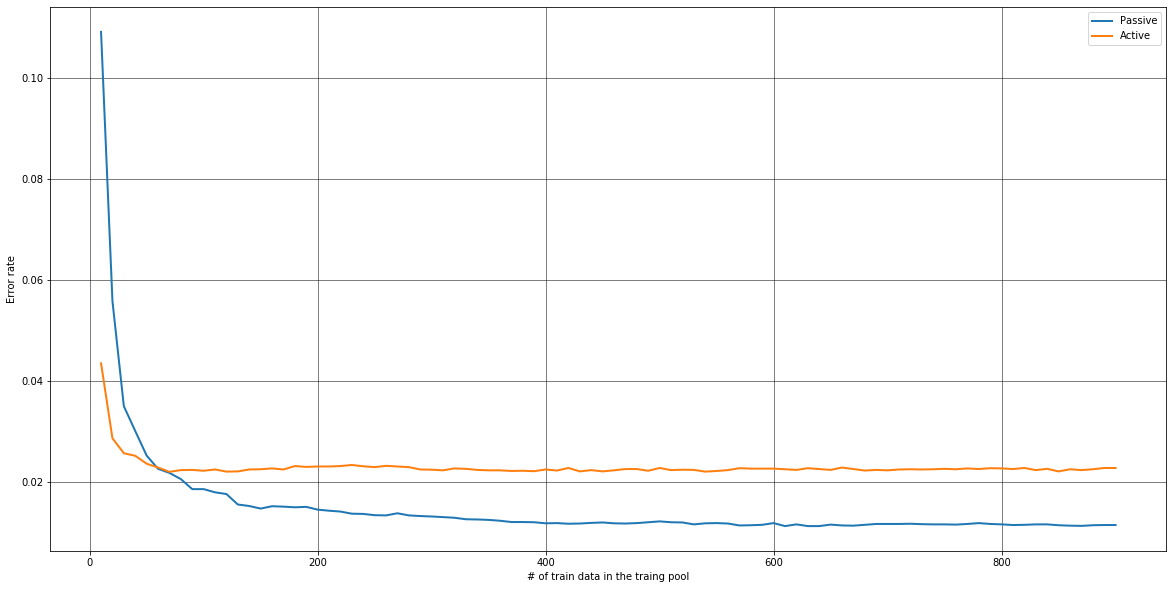

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(Instance, MeanPassError,label="Passive", linewidth=2)
plt.plot(Instance, MeanActError,label="Active", linewidth=2)
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlabel('# of train data in the traing pool')
plt.ylabel('Error rate')
plt.show()



In [8]:
dif=MeanPassError-MeanActError
index_dif=np.where(abs(MeanPassError-MeanActError) <=0.001)# Find intersection
print('When Train pool size is smaller than range of ', Instance[index_dif],' Active learning performs better')

When Train pool size is smaller than range of  [60. 70.]  Active learning performs better


We can make conclusion from graph that when number of training pool increasing, the passive learning performs better. 